## Import data & EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
def plot_null_values(df):
    dict_null_count = {}

    for col in df.columns:
        null_count = df[col].isnull().sum()
        if null_count > 0:
            dict_null_count[col] = null_count

    x = np.arange(len(dict_null_count))
    y = dict_null_count.values()

    plt.bar(x, y)
    plt.xticks(x, dict_null_count.keys(), rotation='vertical')
    plt.show()

In [3]:
df_train_data = pd.read_csv('../data/madelon_train.data', sep=' ', header=None)
df_test_data = pd.read_csv('../data/madelon_test.data', sep=' ', header=None)
df_valid_data = pd.read_csv('../data/madelon_valid.data', sep=' ', header=None)

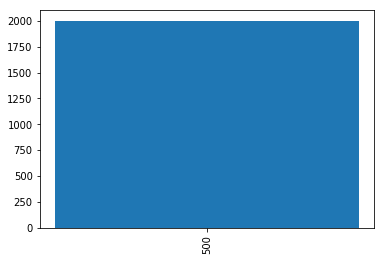

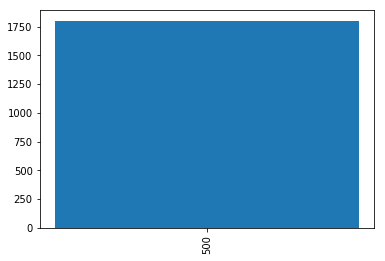

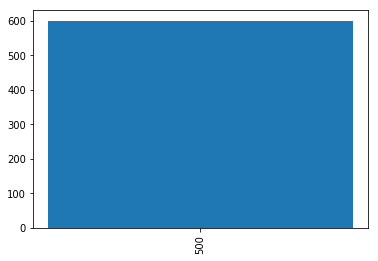

In [4]:
plot_null_values(df_train_data)
plot_null_values(df_test_data)
plot_null_values(df_valid_data)

In [5]:
df_train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,485,477,537,479,452,471,491,476,475,473,...,481,477,485,511,485,481,479,475,496,NaN
1,483,458,460,487,587,475,526,479,485,469,...,478,487,338,513,486,483,492,510,517,NaN
2,487,542,499,468,448,471,442,478,480,477,...,481,492,650,506,501,480,489,499,498,NaN
3,480,491,510,485,495,472,417,474,502,476,...,480,474,572,454,469,475,482,494,461,NaN
4,484,502,528,489,466,481,402,478,487,468,...,479,452,435,486,508,481,504,495,511,NaN


In [7]:
df_test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,483,460,559,477,462,491,499,475,495,479,...,480,546,630,434,497,479,503,465,494,NaN
1,484,509,538,473,548,497,551,477,498,471,...,482,493,442,440,587,475,483,509,455,NaN
2,476,529,558,477,505,486,545,477,473,480,...,482,465,389,460,459,484,476,564,521,NaN
3,487,475,480,494,477,472,512,477,486,480,...,476,536,622,523,445,481,490,481,548,NaN
4,486,490,480,471,520,481,437,476,484,482,...,473,474,491,516,515,475,497,453,497,NaN


In [8]:
df_valid_data.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,483,454,513,495,523,469,453,477,506,479,...,480,543,259,413,520,485,498,523,510,NaN
1,485,508,493,487,478,472,504,476,479,475,...,480,535,534,514,452,484,495,548,477,NaN
2,483,521,507,475,493,486,421,475,496,483,...,476,498,495,508,528,486,465,508,503,NaN
3,474,504,576,480,553,483,524,478,483,483,...,475,470,463,509,525,479,467,552,517,NaN
4,495,474,523,479,495,488,485,476,497,478,...,471,522,343,509,520,475,493,506,491,NaN


In [9]:
df_train_data.shape, df_test_data.shape, df_valid_data.shape

((2000, 501), (1800, 501), (600, 501))

In [10]:
df_train_data[500].unique(), df_test_data[500].unique(), df_valid_data[500].unique()

(array([ nan]), array([ nan]), array([ nan]))

In [11]:
df_train_data.drop(500, axis=1, inplace=True)
df_test_data.drop(500, axis=1, inplace=True)
df_valid_data.drop(500, axis=1, inplace=True)
df_train_data.shape, df_test_data.shape, df_valid_data.shape

((2000, 500), (1800, 500), (600, 500))

In [12]:
df_train_sum = np.array(df_train_data.sum(axis=0)).sum()
df_test_sum = np.array(df_test_data.sum(axis=0)).sum()
df_valid_sum = np.array(df_valid_data.sum(axis=0)).sum()
df_train_sum, df_test_sum, df_valid_sum

(488083511, 439209553, 146395833)

In [13]:
df_sum = df_train_sum + df_test_sum + df_valid_sum
df_sum

1073688897

In [15]:
df_train_data.to_pickle('../pickled_data-UCI/madelon_train_data.p')
df_test_data.to_pickle('../pickled_data-UCI/madelon_test_data.p')
df_valid_data.to_pickle('../pickled_data-UCI/madelon_valid_data.p')

## Import labels & EDA

In [16]:
df_train_labels = pd.read_csv('../data/madelon_train.labels', sep=' ', header=None)
df_valid_labels = pd.read_csv('../data/madelon_valid.labels', sep=' ', header=None)

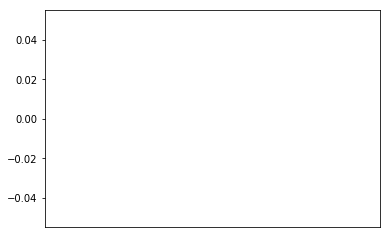

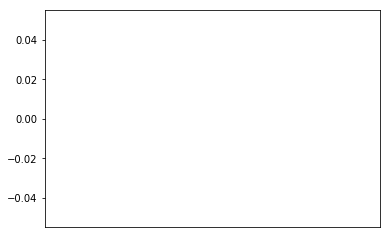

In [17]:
plot_null_values(df_train_labels)
plot_null_values(df_valid_labels)

In [18]:
df_train_labels.head()

,0
0,-1
1,-1
2,-1
3,1
4,1


In [19]:
df_train_labels.shape

(2000, 1)

In [20]:
df_train_labels[0].unique()

array([-1,  1])

In [21]:
df_train_labels[0].sum()

0

In [22]:
df_valid_labels.head()

,0
0,-1
1,-1
2,-1
3,1
4,-1


In [23]:
df_valid_labels.shape

(600, 1)

In [24]:
df_valid_labels[0].unique()

array([-1,  1])

In [25]:
df_valid_labels[0].sum()

0

In [26]:
df_train_labels.to_pickle('../pickled_data-UCI/madelon_train_labels.p')
df_valid_labels.to_pickle('../pickled_data-UCI/madelon_valid_labels.p')

## Select training data

In [27]:
df_sample_data = df_train_data.sample(1000)

In [28]:
df_sample_data.shape

(1000, 500)

In [29]:
df_sample_data.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
1860,489,468,523,477,433,481,500,476,474,478,...,504,478,488,426,462,545,476,476,505,502
353,480,463,553,479,516,485,494,474,493,485,...,451,477,427,435,510,554,478,483,505,502
1333,483,443,484,487,539,480,451,475,505,470,...,459,476,464,594,519,501,471,506,537,484
905,482,445,509,484,498,485,507,474,489,481,...,483,478,453,617,534,506,486,474,458,502
1289,491,498,542,475,516,477,435,476,471,479,...,500,474,467,643,527,545,486,484,519,479


In [30]:
df_sample_data.to_pickle('../pickled_data-UCI/sample_1/df_sample_data.p')

In [31]:
df_sample_data.index.values

array([1860,  353, 1333,  905, 1289, 1273,  938, 1731,   65, 1323,   56,
       1292, 1118,  584,  374,  275,  746,  128, 1646, 1852,  674, 1664,
       1981, 1083, 1922,   99, 1179,  964,  792,   29,  628,  944,  572,
        907, 1080,  450, 1609, 1290, 1078,  254,  124, 1927,  251,  585,
       1568,  824,  507,  889,   70, 1608, 1532,  247, 1450,  212,  909,
       1741, 1244, 1696, 1182,  361, 1473,  678, 1621, 1089, 1987, 1847,
        987, 1512,  111, 1487, 1453,  383, 1395, 1054,  755,  324, 1623,
        787,  368, 1819,   69,  857, 1483, 1555, 1691, 1474, 1798,  478,
        281, 1647, 1556, 1729,  210,  297, 1884, 1833,  651, 1233, 1502,
       1931,  916,  993,  429, 1370,  239,  879,  620,  256,  611,  544,
        771, 1419, 1041, 1789,  759,  382, 1103,  973,  352, 1605, 1825,
       1036, 1107,  494,  393, 1546,  464,  886, 1193,  366, 1893, 1873,
        744,  529,  802, 1223, 1978, 1905, 1699, 1544, 1313,  306, 1666,
        862, 1566,  530,  654, 1259,  233,  120, 16

In [32]:
df_sample_labels = df_train_labels.iloc[df_sample_data.index.values]

In [33]:
df_sample_labels.shape

(1000, 1)

In [34]:
df_sample_labels.to_pickle('../pickled_data-UCI/sample_1/df_sample_labels.p')